In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df=pd.read_csv('Titanic-Data.csv')

In [20]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
mapping={"male":0,"female":1}
df['Sex']=df['Sex'].map(mapping)

In [24]:
df.drop(columns=['Ticket','Name','Cabin','Embarked'],inplace=True)

In [25]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [26]:
y=df.Survived
df.drop(columns=['Survived'],inplace=True)
x=df

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=33)

In [34]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3).fit(x_train,y_train)
print(model.score(x_test,y_test))

0.8134328358208955


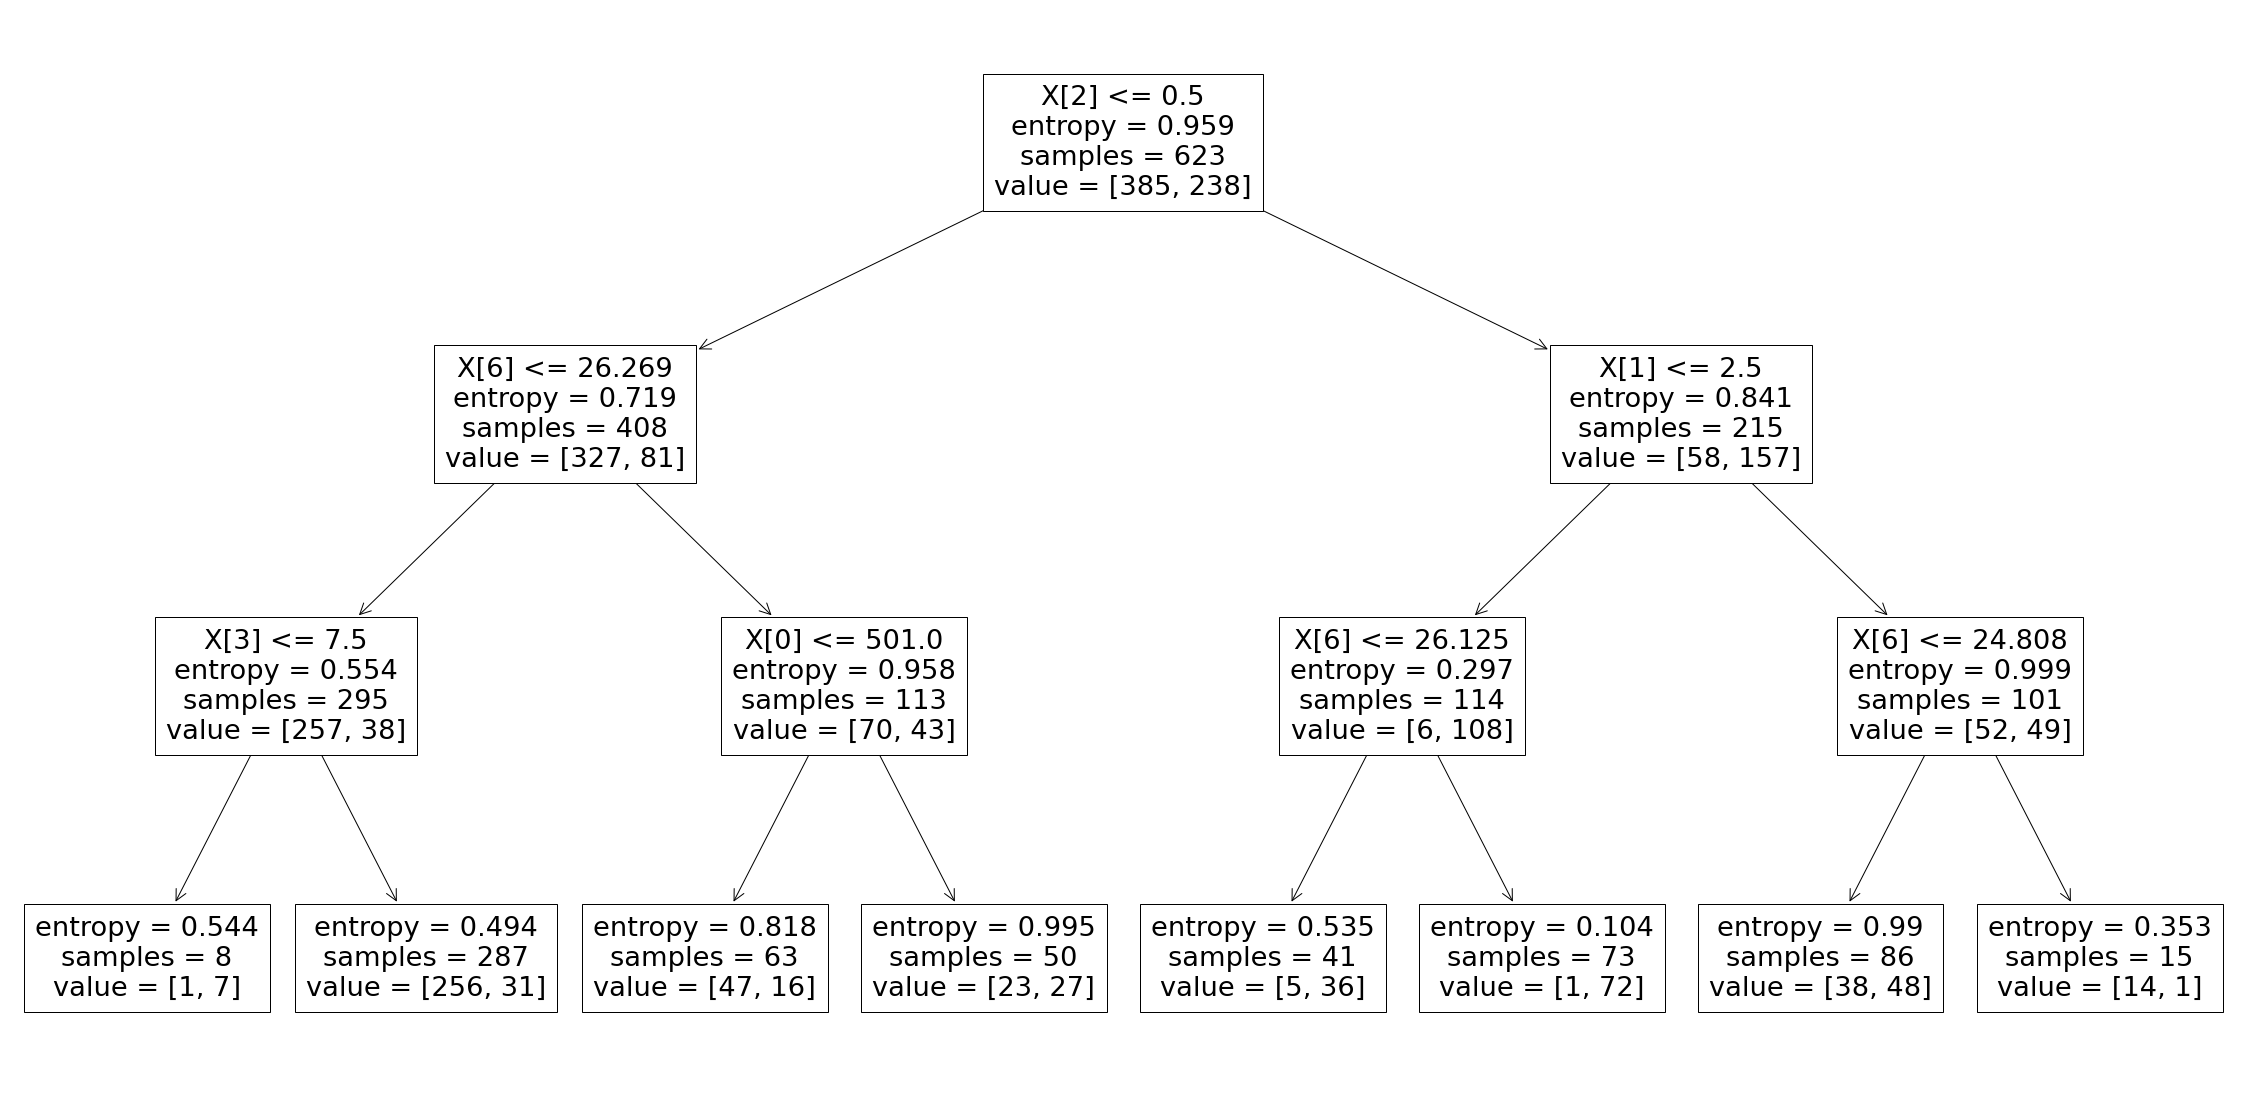

In [35]:
plt.figure(figsize=(40,20))
plot_tree(model)
plt.show()

In [30]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB().fit(x_train,y_train)
print(model.score(x_test,y_test))

0.8097014925373134


In [36]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier().fit(x_train,y_train)
print(model.score(x_test,y_test))

0.832089552238806
